<a href="https://colab.research.google.com/github/elizavetakotelnikova/Basic_statistics_projects/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# import libraires
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

URL = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'
df = pd.read_csv(URL)
df

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


In [21]:
df.columns

Index(['expr', 'age', 'dose'], dtype='object')

In [22]:
columns = ['expr', 'age']
for col in  columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

<Axes: title={'center': 'expr'}, xlabel='dose'>

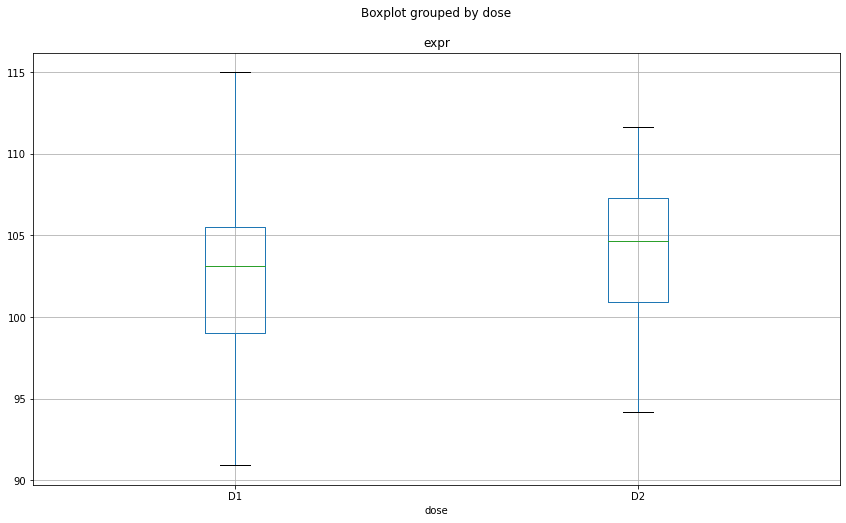

In [23]:
df.boxplot('expr', by= 'dose', figsize=(14, 8), grid=True)

<Axes: title={'center': 'expr'}, xlabel='age'>

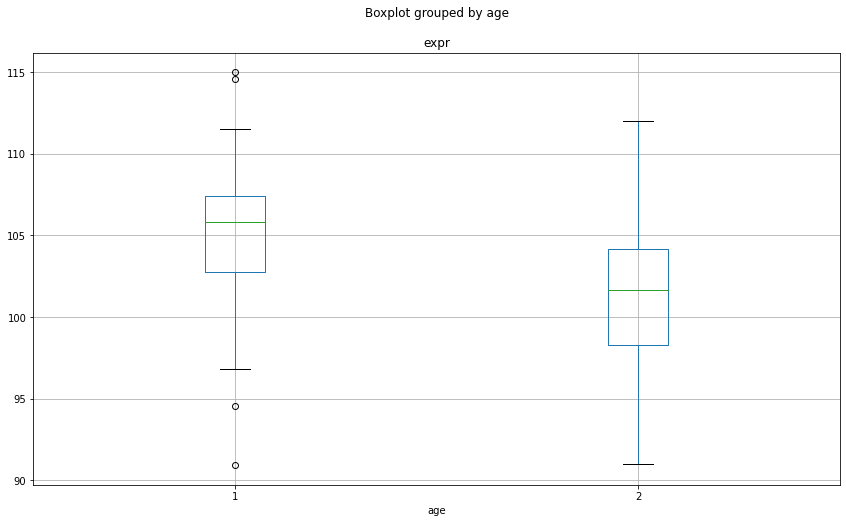

In [24]:
df.boxplot('expr', by= 'age', figsize=(14, 8), grid=True)

Looking at boxplot graphics, we can see a significant difference in Means (grouped by age). Should definitely check it by finding F and P-values.

# `Finding F and P-values`

In [25]:
G1_A1_D1 = df[(df['age'] == 1) & (df['dose'] == 'D1')]
G2_A1_D2 = df[(df['age'] == 1) & (df['dose'] == 'D2')]
G3_A2_D1 = df[(df['age'] == 2) & (df['dose'] == 'D1')]
G4_A2_D2 = df[(df['age'] == 2) & (df['dose'] == 'D2')]

# Test
G1_A1_D1

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
5,106.060605,1,D1
6,114.593613,1,D1
7,103.445769,1,D1
8,102.818702,1,D1
9,105.053772,1,D1


In [26]:
# P > 0.05 and F over 2, tells us that compared 4 goups all together don't have statistically significant difference, but the results are "on the border"
# In this case F is over 2, we can look at each group separately to understand if there is a correlation


Res_A1_D1 = G1_A1_D1["expr"]
Res_A1_D2 = G2_A1_D2["expr"]
Res_A2_D1 = G3_A2_D1["expr"]
Res_A2_D2 = G4_A2_D2["expr"]
print("Results fot all 4 groups:", stats.f_oneway(Res_A1_D1, Res_A1_D2, Res_A2_D1, Res_A2_D2))


Results fot all 4 groups: F_onewayResult(statistic=2.707638006827807, pvalue=0.05309710567334635)


In [27]:
A1 = df[df["age"] == 1]["expr"]
A2 = df[df["age"] == 2]["expr"]
D1 = df[df["dose"] == "D1"]["expr"]
D2 = df[df["dose"] == "D2"]["expr"]

In [28]:
# F and P-values for groups with age_one and group with dose_one

stats.f_oneway(A1, D1)

F_onewayResult(statistic=2.7975396104391184, pvalue=0.09944849951092954)

In [29]:
# F and P-values for groups with age_one and group with dose_second

stats.f_oneway(A1, D2)

F_onewayResult(statistic=0.9724991138629211, pvalue=0.3278906294824979)

In [30]:
# F and P-values for groups with age_second and group with dose_one

stats.f_oneway(A2, D1)

F_onewayResult(statistic=0.8403405909846235, pvalue=0.36285146466060336)

In [31]:
# F and P-values for groups with age_second and group with dose_second

stats.f_oneway(A2, D2)

F_onewayResult(statistic=3.2601127057104002, pvalue=0.0758394699711344)

In [32]:
# F and P-values for groups with age_one and group with age_second

#Here we can see a statisically sigificant difference - p-value is way less than 0.05, F-value is 7.613
#We can draw a conclusion that the results are quite different because of age 

stats.f_oneway(A1, A2)

F_onewayResult(statistic=7.612770077046976, pvalue=0.007608712054113225)

In [33]:
# F and P-values for groups with dose_one and dose_two

stats.f_oneway(D1, D2)

F_onewayResult(statistic=0.5862334097242099, pvalue=0.44678441580203143)

In [49]:
# ANOVA, expr ~ age + dose

model = ols('expr ~ age + dose', data=df).fit()
result = sm.stats.anova_lm(model, type=2)

print(result)

            df       sum_sq     mean_sq         F    PR(>F)
dose       1.0    16.912241   16.912241  0.648351  0.423830
age        1.0   197.452754  197.452754  7.569592  0.007804
Residual  61.0  1591.184501   26.084992       NaN       NaN


In [36]:
# Conclusion
# Null hypothesis that age of participants does not have an impact is rejected, since we got a (p-value < 0.05) and (F > 7) when compared two age groups. Results have a significant difference by age.
# In other cases, we haven't got any intersting result (p-value was > 0.05 and F-value was close to zero). Dose_one and dose_two do not affect the result significantly.